# Simple Linear Regression

## Predicting MPG of automobiles
--------------------------------
- Dataset used: Automobile MPG
- Source of data: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/
- Machine Learning method: Simple Linear Regression
- Dataset explanation:
    - auto-mpg.data : cleaned dataset with missing values filled
    - auto-mpg.data-original : raw dataset containing missing values
    - auto-mpg.names : detailed description of the dataset

- Context:
    - In order to make this tutorial to be more meaningful, we will need to understand the context of data as well as the goal of this exercise. This data contains city-use fuel consumption of each specified vehicles in miles per gallon unit. Let us see if we can predict the mpg of a car from either its weight. **We want to see of weight of a car has any effect on its fuel consumption**.
- Goal:
    - Answering the question "**Can we predict the fuel consumption of a car based on its weight?**"
    
    
- Some quick tips for jupyter notebook
    - green bar at the left indicates you're in EDITING mode
    - blue bar at the left indicates you're in CELL NAVIGATION mode
    - Press **m** in CELL NAVIGATION mode to turn a cell into markdown (you can write your note in this mode)
    - Press **y** in CELL NAVIGATION mode to turn a cell into code (you can code in this mode)
    - Alternatively, go to the menu bar and choose **Cell -> Cell Type -> Code / Markdown** to convert cell to either markdown or code

In [2]:
# Importing library

# `! pip3 install pandas` in one of the cell if you do not have pandas installed.
import pandas as pd  # for the dataframe


In [20]:
# Dataset sources

# Specify the dataset dir using variable so 
# it's easier when we need to move the dataset around
dataset_dir = './dataset/'

# list the available datasets using dictionary for easier reference
filenames = {
    'raw_data': 'auto-mpg.data-original',
    'clean_data': 'auto-mpg.data',
}


In [51]:
# Read data

# The information is taken from auto-mpg.names file
"""
Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)
"""

# specify the column name here.
colnames = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
    'origin',
    'car name'
]

# read the actual dataset here
df = pd.read_csv(dataset_dir + filenames['clean_data'],
                 delim_whitespace=True, # use whitespace as delimiter
                 header=None, # no column names in the dataaset
                 names=colnames # use our own specified column names
                ) 


In [52]:
# Light cleaning of the data. 

# Horsepower column has some missing values and in string format
# Let's remove rows with missing values and format it into numeric

# code below basically means, remove all rows that contain '?' in horsepower column
df = df[~df.horsepower.str.contains('\?')]
df['horsepower'] = df['horsepower'].astype(float)

In [53]:
# Check information and shape of the dataframe

display(df.info())
print("Shape of dataframe:", df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


None

Shape of dataframe: (392, 9)


In [64]:
# Take a peek into the dataframe to see how the values look
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


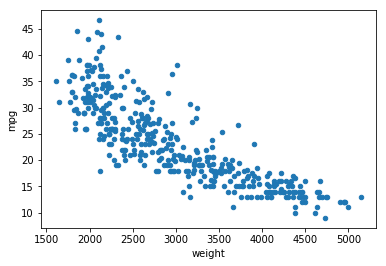

In [140]:
# Get a better feel of our automobile data by visualizing them

df.plot(x='weight', y='mpg', kind='scatter')


Looking at the scatter plot, there seems to be a negative linear relationship between weight <> mpg. Simple linear regression will be able to model this linear relationship well. Let us model this relationship using simple linear regression to better predict the fuel consumption of a car (MPG) given the weight.

In [89]:
# importing sklearn library
# `! pip3 install sklearn` in one of the cell if you do not have sklearn installed.

# linear_model is where the collection of linear machine learning model located
from sklearn import linear_model

# train_test_split is useful to split data into train and test set
from sklearn.model_selection import train_test_split

# numpy is needed to create dataset to do test prediction
import numpy as np

In [90]:
# specify data into X and y variable

# reshape is required here as the requirement for input_data to model
X = df.weight.values.reshape(-1,1)
y = df.mpg

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [92]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
# Make prediction based on the model
y_predict = model.predict(X_test)

In [141]:
# Get all the prediction and actual results into a table
result_table = pd.DataFrame({
    'X_test': X_test.flatten(), # np.flatten() to reshape data from 2D to 1D
    'y_actual': y_test.values,
    'y_predict': y_predict
})

# Calculate the error in prediction using squared error method
def squared_error(x1, x2):
    return np.sqrt((x1-x2)**2 )

result_table['sqrt_error'] = result_table.apply(lambda x: squared_error(x.y_actual, x.y_predict), axis=1)

# Let's take a peek of the resulting table
result_table.head()

,X_test,y_actual,y_predict,sqrt_error
0,2962.0,18.0,23.716319,5.716319
1,2904.0,23.0,24.164527,1.164527
2,4209.0,14.0,14.079842,0.079842
3,4382.0,11.0,12.742945,1.742945
4,2124.0,18.0,30.192155,12.192155


In [139]:
# Average error in prediction (or more commonly known as MSE - Mean Squared Error)
print('Average Error:', result_table.sqrt_error.mean())

Average Error: 3.2594498318294507


Conclusion
---------------

We can see that using a very simple linear regression, we manage to do prediction with error margin of 3.25 mpg. This is quite close to zero (*Zero would mean our prediction is unbelievably 100% correct*) and is considered good although there is still room of improvement.

We can interpret it this way: This exercise shows that **the heavier a car is, the more fuel it will consume and thus it will need more gallons of fuel to go for longer miles (or distance)**.

Next, we can think on how to improve this further. 
- How to improve the prediction accuracy? 
- What parameters can we tune? 
- Some cars have higher margin of error than the others. Why is that? Is there possibly other factor affecting MPG? 
- Can we add more independent variable (or predictor variable) to increase the accuracy?